# Kurjenmiekka (Iris) - harjoitus


## 1. Tavoitteet

Tavoitteena on oppia mallintamaan päätöspuun avulla.



## 2. Datan tarkastelu, muokkaaminen, siivoaminen, kuvantaminen ja analysointi

Esitä muuttujat ja tietotyypit.

Mikä on datan koko?

Onko puuttuvia tai poikkeavia arvoja?

Mitä datasta voi päätellä?


In [1]:
#pip install seaborn
#pip install pandas
import pandas as pd
import seaborn as sns

In [2]:
data = sns.load_dataset('iris')
data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
korr = data.loc[:, 'sepal_length':'petal_width'].corr()
korr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

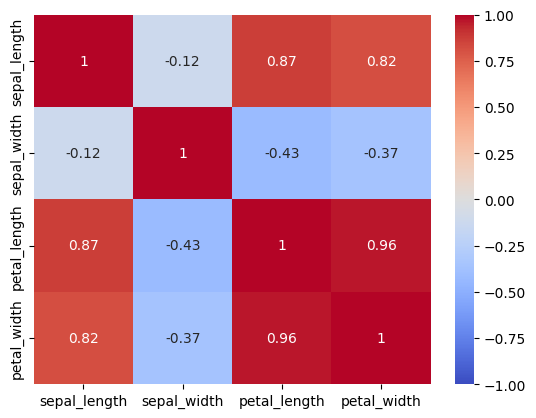

In [8]:
sns.heatmap(korr, vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True)

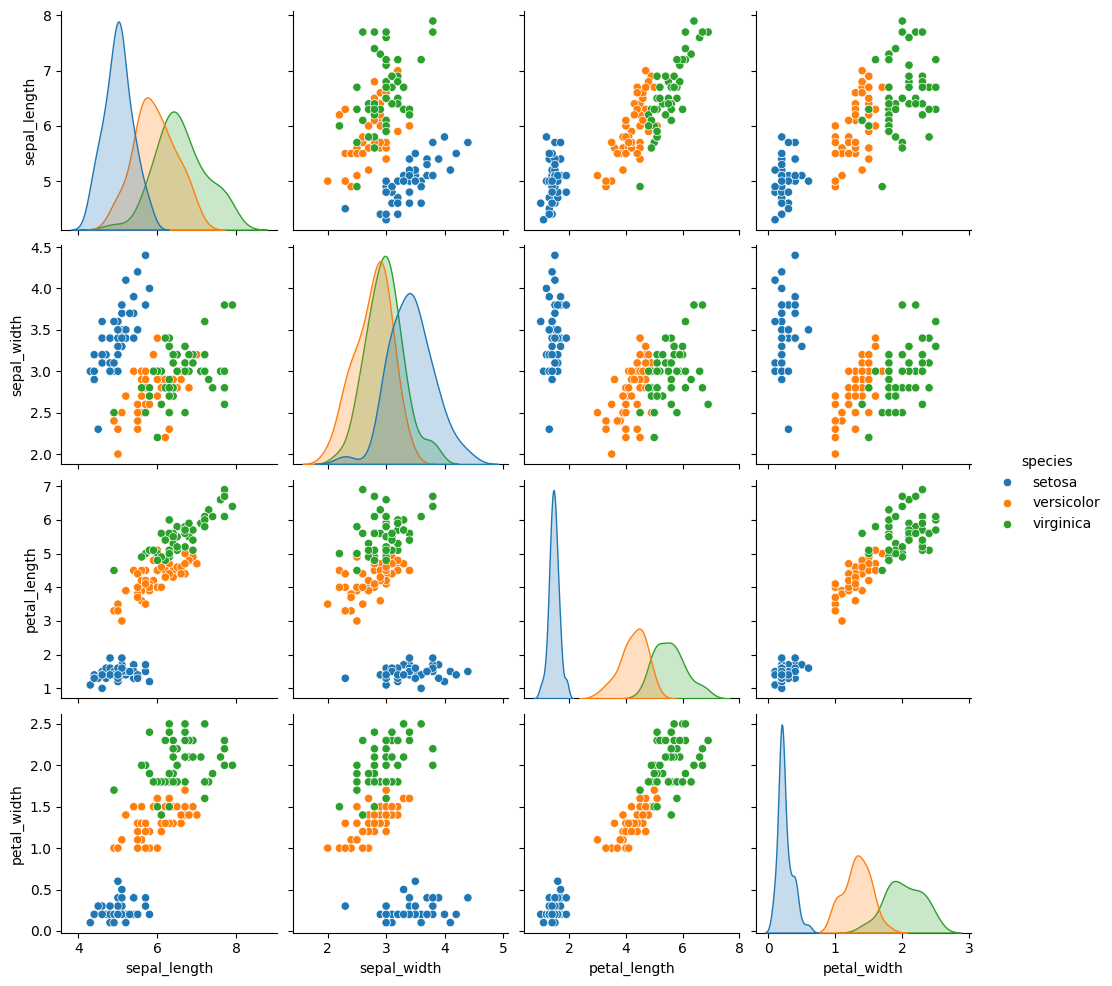

In [9]:
sns.pairplot(data, hue='species')

## 3. Datan valmistelu

Miten data esikäsitellään mallinnusta varten?

Jaetaanko data mallin kouluttamisdataan ja testidataan?




In [10]:
colnames = data.columns
colnames

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
#selittävät muuttujat
X = data.loc[:, 'sepal_length':'petal_width']
#vastemuuttuja
Y = data.loc[:, 'species']

## 4. Mallinnus

Millä menetelmillä data analysoidaan? Miksi juuri tämä menetelmä on valittu?

Millä parametreillä?

Mitä tuloksia analyysistä saadaan?



In [12]:
#pip install scikit-learn
from sklearn import tree

In [13]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

In [14]:
print(tree.export_text(classifier, feature_names=colnames[:4]))

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal_length >  4.95
|   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



In [15]:
tree.export_graphviz(classifier)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[2] <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[3] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="x[2] <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="gini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 5 ;\n6 [label="x[2] <= 4.85\\ngini = 0.043\\nsamples = 46\\nvalue = [0, 1, 45]"] ;\n2 -> 6 ;\n7 [label="gini = 0.444\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 43\\nvalue = [0, 0, 43]"] ;\n6 -> 8 ;\n}'

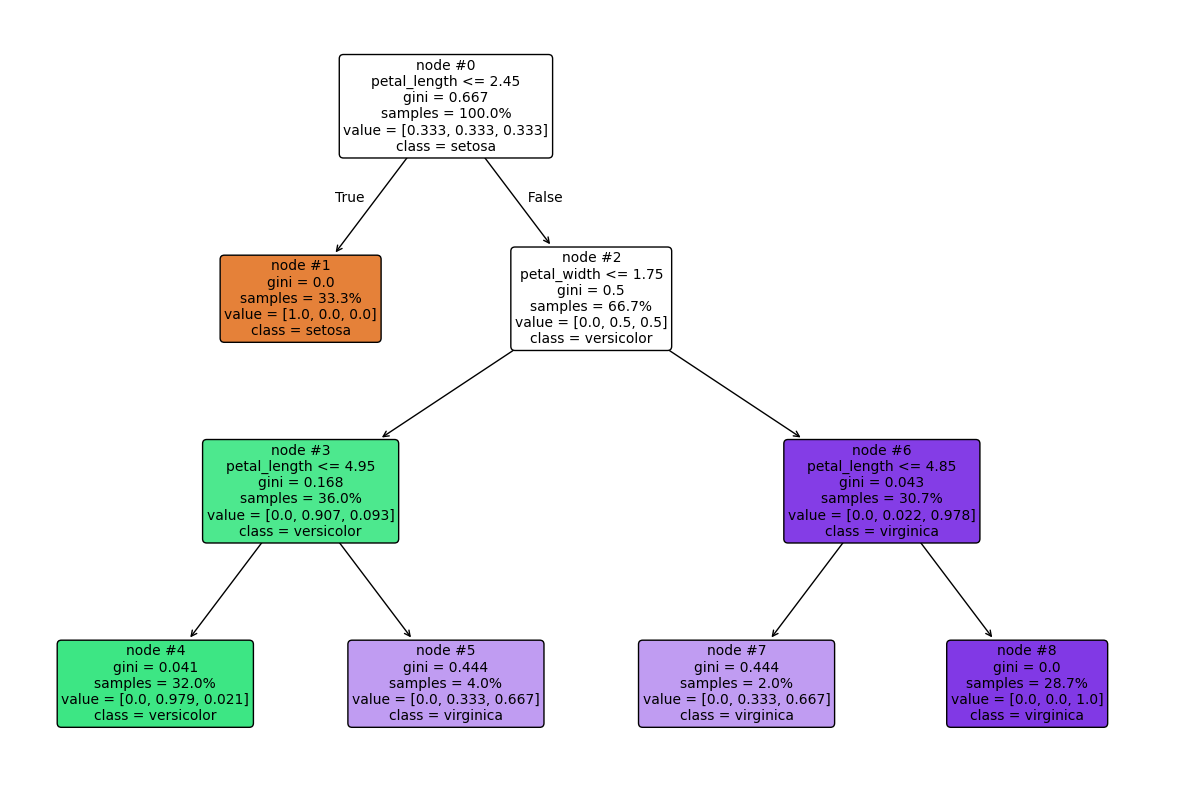

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

tree.plot_tree(classifier, node_ids=True, class_names=classifier.classes_,filled=True,proportion=True, rounded=True, feature_names=colnames,fontsize=10)
plt.show()

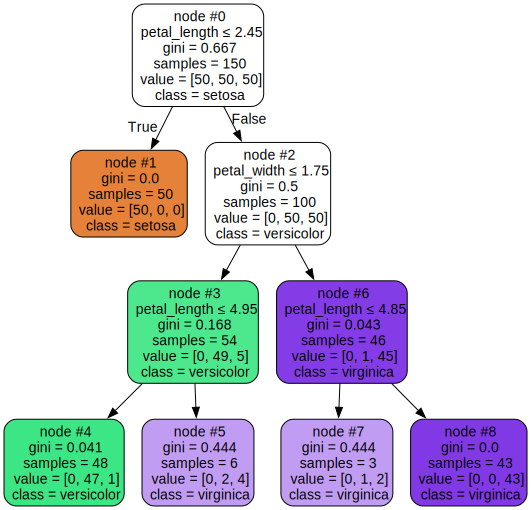

In [17]:
import graphviz
import os
from pathlib import Path

os.environ['PATH'] += os.pathsep +str(Path('..').resolve() / Path('Graphviz-12.1.2-win64/bin/'))

visualisointi = tree.export_graphviz(classifier, out_file=None,
feature_names=colnames[:4],
class_names=classifier.classes_,
filled=True,
node_ids=True,
#proportion=True
rounded=True, 
special_characters=True,
                                                                                                             )

graph = graphviz.Source(visualisointi)
graph


## 5. Evaluointi/Arvionti

Miten tulosta voi tulkita? Onko jotain yllättävää?

Onko malli toimiva vai pitääkö mallia kehittää edelleen?


## Raportointi / Johtopäätökset / Täytäntöönpano

Miten tulokset vastaavat tavoitteeseen?

Mitä toimenpidesuosituksia?